In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

In [2]:
# Import the csvs into DataFrames
dairy = pd.read_csv("Resources/dymfg.csv")
meat = pd.read_csv("Resources/mtpcc.csv")
fats = pd.read_csv("Resources/fats.csv")
fruit = pd.read_csv("Resources/frtot.csv")
veggie = pd.read_csv("Resources/vegtot.csv")
grain = pd.read_csv("Resources/grains.csv")
sugar = pd.read_csv("Resources/sugar.csv")
fats.head()

,Year,Variable,Unit,Commodity,Primary weight,Loss from primary to retail weight,Retail weight,Loss from retail/institutional to consumer level,Consumer weight,Nonedible share,Edible weight,Other (cooking loss and uneaten food),"Total loss, all levels",Per capita availability (lbs/year),Per capita availability (oz/day),Per capita availability (g/day),Calories per fat gram,Daily fat grams,Calories available daily
0,1970,Added fats and oils,Pounds,Butter,5.365702,0.0,5.365702,7.0,4.990103,0.0,4.990103,35.0,39.55,3.243567,0.142184,4.030839,9.0,3.224671,29.022038
1,1971,Added fats and oils,Pounds,Butter,5.145983,0.0,5.145983,7.0,4.785764,0.0,4.785764,35.0,39.55,3.110747,0.136362,3.865780,9.0,3.092624,27.833619
2,1972,Added fats and oils,Pounds,Butter,4.951438,0.0,4.951438,7.0,4.604837,0.0,4.604837,35.0,39.55,2.993144,0.131206,3.719634,9.0,2.975707,26.781362
3,1973,Added fats and oils,Pounds,Butter,4.807295,0.0,4.807295,7.0,4.470784,0.0,4.470784,35.0,39.55,2.906010,0.127387,3.611350,9.0,2.889080,26.001719
4,1974,Added fats and oils,Pounds,Butter,4.460408,0.0,4.460408,7.0,4.148179,0.0,4.148179,35.0,39.55,2.696316,0.118195,3.350760,9.0,2.680608,24.125475


In [4]:
#Group by Year, combine into singular DataFrame
#Dairy
Dairy = dairy.groupby('Year').sum().reset_index()
Dairy['Dairy'] = round(Dairy['Calories available daily '],2)
total = Dairy[['Year', 'Dairy']]

#Meat
Meat = meat.groupby('Year').sum().reset_index()
total['Meat'] = round(Meat['Calories available daily '],2)

#Fats
Fats = fats.groupby('Year').sum().reset_index()
total['Fats'] = round(Fats['Calories available daily '],2)

#Fruits
Fruit = fruit.groupby('Year').sum().reset_index()
total['Fruit'] = round(Fruit['Calories available daily '],2)

#Vegetables
Veggie = veggie.groupby('Year').sum().reset_index()
total['Vegetable'] = round(Veggie['Calories available daily '],2)

#Grain
Grain = grain.groupby('Year').sum().reset_index()
total['Grain'] = round(Grain['Calories available daily '],2)

#Sugar
Sugar = sugar.groupby('Year').sum().reset_index()
total['Sugar'] = round(Sugar['Calories available daily '],2)

total = total.set_index('Year')
total2 = round(total.div(total.sum(axis=1), axis=0),4)
total2 = total2.reset_index()
total = total.reset_index()
total.head()

C:\Users\alana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\alana\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\alana\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

,Year,Dairy,Meat,Fats,Fruit,Vegetable,Grain,Sugar
0,1970,250.29,508.90,346.18,71.28,134.64,409.81,332.54
1,1971,250.85,516.36,341.93,73.05,132.25,403.74,335.32
2,1972,248.88,515.38,353.23,68.73,131.78,399.03,339.19
3,1973,247.48,486.20,356.92,71.76,132.00,410.80,340.26
4,1974,240.66,502.62,349.17,72.55,126.80,406.40,328.81


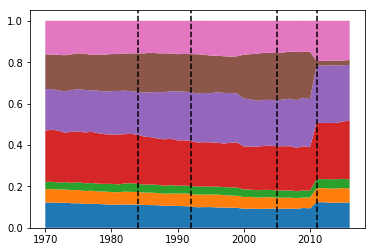

In [6]:
# Test Graph. Note that the Fats/Grain that were changed will be fixed after we meet on Tueday
legend = ['Dairy', 'Vegetables', 'Fruit', 'Meat', 'Grain','Fats', 'Sugar']
plt.stackplot(total2.Year, total2.Dairy, 
         total2.Vegetable,
         total2.Fruit,
         total2.Meat,  
         total2.Grain,
         total2.Fats,
         total2.Sugar)

xposition = [1984, 1992, 2005, 2011]
for xc in xposition:
   plt.axvline(x=xc, color='black', linestyle='--')



#plt.legend(legend)

Text(0.5, 1.0, 'Consumption Percentages of Food Types in 1983')

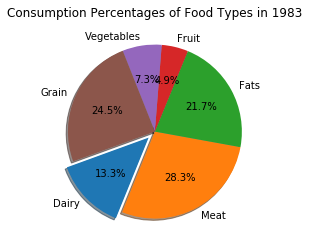

In [7]:
# Chris' Block --------------------------------------
#1983, index(13)
data_1983 = total.loc[13,:]
#print(data_1983)
data=data_1983[[1,2,3,4,5,6]]
print(data)
print(sum(data))
#Labels
legend = ['Dairy', 'Meat', 'Fats', 'Fruit', 'Vegetables', 'Grain']
#print(legend)
explode = (.1, 0, 0, 0, 0, 0)
#pie
plt.pie(data, explode=explode, labels=legend, shadow=True, autopct="%1.1f%%", startangle=200)
plt.title("Consumption Percentages of Food Types in 1983")
# Save the figure
plt.savefig("Images/Consumption_percentages_1983.png")
#------------------------------------------------------------------


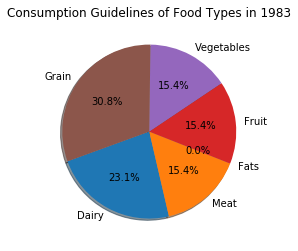

In [8]:
# Chris's Block 2 -----------------------------------------
#Food guideline
guide_data = [3, 2, 0, 2, 2, 4]
#Guideline Piechart
plt.pie(guide_data, labels=legend, shadow=True, autopct="%1.1f%%", startangle=200)
plt.title("Consumption Guidelines of Food Types in 1983")
# Save the figure
plt.savefig("Images/Recommended_percentages_1983.png")